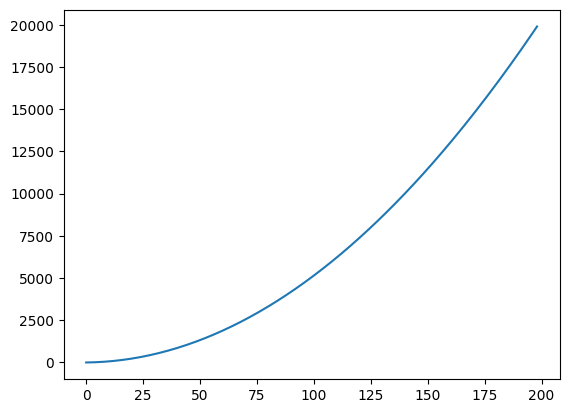

[1,
 3,
 6,
 10,
 15,
 21,
 28,
 36,
 45,
 55,
 66,
 78,
 91,
 105,
 120,
 136,
 153,
 171,
 190,
 210,
 231,
 253,
 276,
 300,
 325,
 351,
 378,
 406,
 435,
 465,
 496,
 528,
 561,
 595,
 630,
 666,
 703,
 741,
 780,
 820,
 861,
 903,
 946,
 990,
 1035,
 1081,
 1128,
 1176,
 1225,
 1275,
 1326,
 1378,
 1431,
 1485,
 1540,
 1596,
 1653,
 1711,
 1770,
 1830,
 1891,
 1953,
 2016,
 2080,
 2145,
 2211,
 2278,
 2346,
 2415,
 2485,
 2556,
 2628,
 2701,
 2775,
 2850,
 2926,
 3003,
 3081,
 3160,
 3240,
 3321,
 3403,
 3486,
 3570,
 3655,
 3741,
 3828,
 3916,
 4005,
 4095,
 4186,
 4278,
 4371,
 4465,
 4560,
 4656,
 4753,
 4851,
 4950,
 5050,
 5151,
 5253,
 5356,
 5460,
 5565,
 5671,
 5778,
 5886,
 5995,
 6105,
 6216,
 6328,
 6441,
 6555,
 6670,
 6786,
 6903,
 7021,
 7140,
 7260,
 7381,
 7503,
 7626,
 7750,
 7875,
 8001,
 8128,
 8256,
 8385,
 8515,
 8646,
 8778,
 8911,
 9045,
 9180,
 9316,
 9453,
 9591,
 9730,
 9870,
 10011,
 10153,
 10296,
 10440,
 10585,
 10731,
 10878,
 11026,
 11175,
 11325,


In [18]:
import matplotlib.pyplot as plt

arr = [1,3]
coef = [2,-1,1]

arr = arr + [0 for i in range(198)]

for i in range(2,len(arr)):
    arr[i] = coef[0] * arr[i-1] + coef[1] * arr[i-2] + coef[2]

plt.plot(arr[:-1])
plt.show()

arr